In [1]:
from quantum_logical.coupling_util import TreeCoupling, CorralCoupling
import matplotlib.pyplot as plt
import networkx as nx
from PIL import Image
import io
import numpy as np

# Example usage
fake_modular = TreeCoupling(module_size=3, children=3, total_levels=3)
print("Modules:", fake_modular.modules)
print("Coupling Map:", fake_modular.c_map)

Modules: {0: [0, 1, 2], 1: [3, 4, 5], 2: [6, 7, 8], 3: [9, 10, 11], 4: [12, 13, 14], 5: [15, 16, 17], 6: [18, 19, 20], 7: [21, 22, 23], 8: [24, 25, 26], 9: [27, 28, 29]}
Coupling Map: [(24, 26), (18, 19), (3, 6), (9, 10), (23, 27), (15, 16), (27, 29), (16, 17), (12, 13), (22, 23), (0, 2), (13, 14), (1, 12), (12, 15), (5, 9), (19, 20), (24, 25), (3, 5), (25, 26), (21, 22), (27, 28), (6, 8), (21, 24), (14, 18), (1, 2), (28, 29), (12, 14), (2, 21), (3, 4), (18, 20), (9, 11), (15, 17), (4, 5), (0, 1), (10, 11), (6, 7), (21, 23), (0, 3), (7, 8)]


In [2]:
def pretty_print_with_networkx(pb, label_text):
    G = nx.Graph()

    # Define colors for different levels
    level_colors = [
        "tab:blue",
        "tab:orange",
        "tab:green",
        "tab:red",
        "tab:purple",
        "tab:brown",
        "tab:pink",
        "tab:gray",
    ]

    # Module information for coloring and labeling
    modules, module_depths = pb.modules, pb.module_depths

    # Node colors and labels based on modules
    node_colors = []
    node_labels = {}
    for module_id, qubits in modules.items():
        depth = module_depths[module_id]
        color = level_colors[depth % len(level_colors)]
        for qubit in qubits:
            node_colors.append(color)
            node_labels[qubit] = f"Q{qubit}"

    # Add nodes and edges (regular edges)
    G.add_nodes_from([qubit for _, qubits in modules.items() for qubit in qubits])
    G.add_edges_from(list(pb.get_edges()))

    # Generate layout
    pos = nx.kamada_kawai_layout(G)

    fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figure size as needed

    # Draw the graph without long edges
    nx.draw_networkx_nodes(
        G, pos, node_size=400, node_color=node_colors, alpha=0.6, ax=ax
    )  # Adjust node_size here
    nx.draw_networkx_labels(
        G, pos, labels=node_labels, font_size=8, ax=ax
    )  # Adjust font_size if necessary
    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=list(pb.get_edges()),
        width=2,
        edge_color="gray",
        style="solid",
        ax=ax,
    )

    # Draw long edges on top of the existing layout, if present
    if hasattr(pb, "long_edges"):
        nx.draw_networkx_edges(
            G,
            pos,
            edgelist=pb.long_edges,
            width=5,
            edge_color="red",
            style="dashed",
            ax=ax,
        )

    ax.set_title(label_text)
    ax.axis("off")  # Turn off the axis

    plt.close(
        fig
    )  # Prevent it from displaying immediately in Jupyter or similar environments

    return fig


pretty_print = pretty_print_with_networkx

Modules: {0: [0, 1, 2, 3], 1: [4, 5, 6, 7], 2: [8, 9, 10, 11], 3: [12, 13, 14, 15], 4: [16, 17, 18, 19], 5: [20, 21, 22, 23], 6: [24, 25, 26, 27], 7: [28, 29, 30, 31], 8: [32, 33, 34, 35], 9: [36, 37, 38, 39]}
Coupling Map: [(16, 20), (8, 9), (28, 30), (24, 26), (18, 19), (20, 22), (14, 15), (8, 11), (9, 10), (7, 12), (25, 27), (38, 39), (16, 17), (12, 13), (5, 7), (22, 23), (0, 2), (3, 28), (1, 3), (13, 14), (16, 19), (33, 35), (12, 15), (29, 31), (28, 32), (24, 25), (20, 21), (36, 38), (1, 16), (30, 31), (25, 26), (32, 34), (26, 27), (4, 6), (20, 23), (21, 22), (17, 18), (19, 24), (37, 39), (5, 6), (4, 8), (1, 2), (0, 4), (28, 29), (12, 14), (29, 30), (8, 10), (2, 3), (28, 31), (24, 27), (9, 11), (36, 37), (32, 33), (4, 5), (0, 1), (10, 11), (36, 39), (37, 38), (6, 7), (32, 35), (16, 18), (33, 34), (4, 7), (21, 23), (0, 3), (17, 19), (34, 35), (31, 36), (13, 15)]
Long Edges: [(13, 25)]


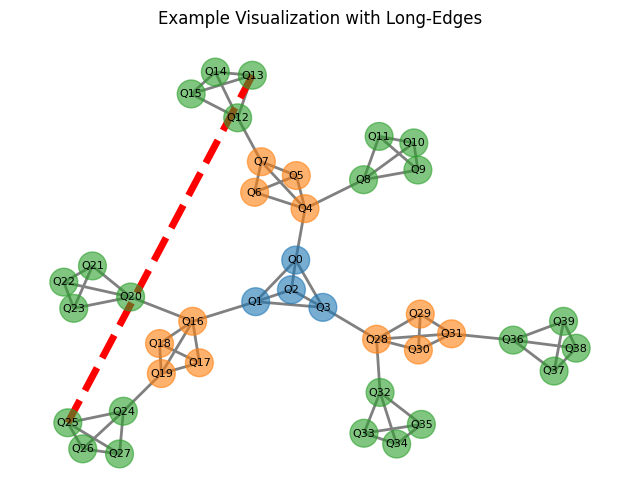

In [3]:
# Example usage
fake_modular = TreeCoupling(module_size=4, children=3, total_levels=3)
fake_modular.add_long_edges(num_long_edges=1)  # Example: Add 2 long-edges
print("Modules:", fake_modular.modules)
print("Coupling Map:", fake_modular.c_map)
print("Long Edges:", fake_modular.long_edges)

# Then, visualize
label_text = "Example Visualization with Long-Edges"
image = pretty_print(fake_modular, label_text)

# Display the image
# set image to active figure of plt
display(image)

In [4]:
# Generate the images with varying numbers of long edges
figures = []

# Adjusted loop to include iteration over number of long edges
for i in range(3, 6):  # Module sizes
    for k in range(1, 6):  # Total levels
        for j in range(i, i + 1):  # Children
            if k == 1 and j != 2:
                continue  # Skip configurations that don't make sense

            try:
                # Create a new instance for each configuration of i, j, k
                pb = TreeCoupling(module_size=i, children=j, total_levels=k)
                num_qubits = pb.num_qubits

                # Determine the maximum number of long edges for this configuration
                max_long_edges = 3 if k > 1 else 0  # At most 4, and 0 if levels=1

                for x in range(max_long_edges + 1):  # Iterate from 0 to max_long_edges
                    if num_qubits <= 64:
                        # Update long edges for the current configuration
                        pb.add_long_edges(num_long_edges=x)

                        label_text = f"Module Size: {i}, Children: {j}, Total Levels: {k}, Num Qubits: {num_qubits}, Long Edges: {x}"
                        print(label_text)

                        # Generate and store the figure for the current configuration
                        fig = pretty_print_with_networkx(pb, label_text)
                        figures.append(fig)

                        # Reset long edges for the next iteration
                        pb.long_edges = (
                            []
                        )  # Clear existing long edges before next addition
            except AssertionError:
                pass

Module Size: 3, Children: 3, Total Levels: 2, Num Qubits: 12, Long Edges: 0
Module Size: 3, Children: 3, Total Levels: 2, Num Qubits: 12, Long Edges: 1
Module Size: 3, Children: 3, Total Levels: 2, Num Qubits: 12, Long Edges: 2
Module Size: 3, Children: 3, Total Levels: 2, Num Qubits: 12, Long Edges: 3
Module Size: 3, Children: 3, Total Levels: 3, Num Qubits: 30, Long Edges: 0
Module Size: 3, Children: 3, Total Levels: 3, Num Qubits: 30, Long Edges: 1
Module Size: 3, Children: 3, Total Levels: 3, Num Qubits: 30, Long Edges: 2
Module Size: 3, Children: 3, Total Levels: 3, Num Qubits: 30, Long Edges: 3
Module Size: 4, Children: 4, Total Levels: 2, Num Qubits: 20, Long Edges: 0
Module Size: 4, Children: 4, Total Levels: 2, Num Qubits: 20, Long Edges: 1
Module Size: 4, Children: 4, Total Levels: 2, Num Qubits: 20, Long Edges: 2
Module Size: 4, Children: 4, Total Levels: 2, Num Qubits: 20, Long Edges: 3
Module Size: 5, Children: 5, Total Levels: 2, Num Qubits: 30, Long Edges: 0
Module Size:

In [5]:
# Create an animation from the figures
# Assuming 'figures' is a list of matplotlib.figure.Figure objects generated from your loop
images = []  # This will hold the PIL Image objects
for fig in figures:
    buf = io.BytesIO()  # Create an in-memory buffer
    fig.savefig(buf, format="png")  # Save the figure to the buffer in PNG format
    buf.seek(0)  # Rewind the buffer to the beginning so we can read from it
    img = Image.open(buf)  # Open the image from the in-memory buffer
    images.append(img)  # Append the PIL Image to the list
    plt.close(fig)  # Close the figure to free memory

gif_path = "networkx_graph_animation.gif"
images[0].save(
    gif_path,
    save_all=True,
    append_images=images[1:],
    optimize=False,
    duration=1500,
    loop=0,
)

Modules: {0: [0, 1], 1: [2, 3], 2: [4, 5], 3: [6, 7], 4: [8, 9], 5: [10, 11], 6: [12, 13], 7: [14, 15], 8: [16, 17], 9: [18, 19], 10: [20, 21], 11: [22, 23], 12: [24, 25], 13: [26, 27], 14: [28, 29], 15: [30, 31]}
Coupling Map: [(8, 9), (17, 21), (3, 31), (11, 14), (28, 30), (13, 17), (7, 10), (24, 26), (18, 19), (3, 6), (20, 22), (14, 15), (8, 11), (9, 10), (2, 4), (23, 27), (15, 16), (18, 21), (14, 17), (9, 12), (15, 18), (16, 17), (0, 30), (25, 29), (12, 13), (22, 23), (21, 25), (0, 2), (13, 14), (27, 31), (16, 19), (1, 30), (12, 15), (5, 9), (22, 25), (23, 24), (1, 5), (19, 20), (13, 16), (24, 25), (2, 31), (20, 21), (23, 26), (19, 22), (7, 11), (30, 31), (25, 26), (3, 7), (4, 6), (20, 23), (21, 22), (14, 16), (26, 27), (17, 18), (10, 12), (27, 28), (0, 29), (25, 28), (6, 8), (26, 29), (5, 6), (21, 24), (1, 2), (17, 20), (27, 30), (28, 29), (0, 31), (12, 14), (29, 30), (8, 10), (1, 4), (2, 3), (11, 15), (28, 31), (24, 27), (3, 4), (18, 20), (2, 5), (4, 5), (0, 1), (10, 11), (9, 13)

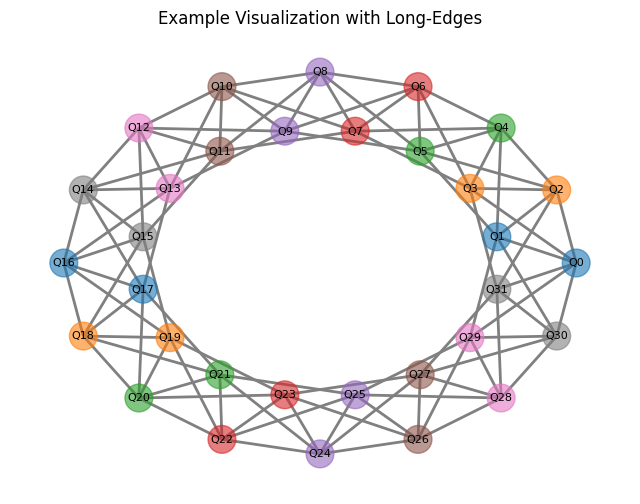

In [21]:
# Example usage
corral_modular = CorralCoupling(num_snails=16, corral_skip_pattern=(0, 1))
corral_modular.add_long_edges(num_long_edges=0)  # Example: Add 2 long-edges
print("Modules:", corral_modular.modules)
print("Coupling Map:", corral_modular.c_map)
print("Long Edges:", corral_modular.long_edges)

# Then, visualize
label_text = "Example Visualization with Long-Edges"
image = pretty_print(corral_modular, label_text)

# Display the image
# set image to active figure of plt
display(image)

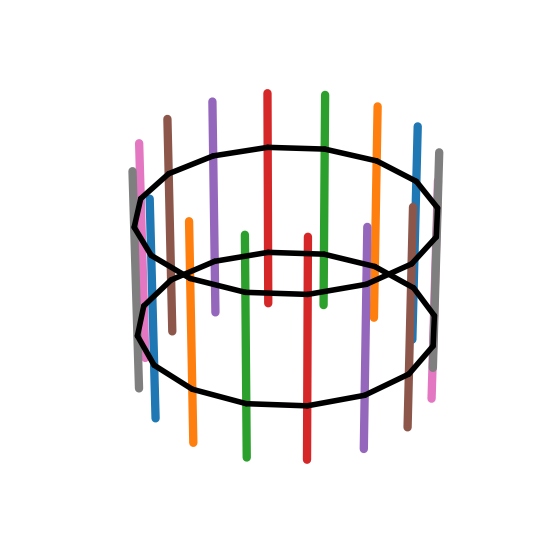

In [19]:
def pretty_print_snails_3d(corral_modular):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection="3d")

    num_snails = corral_modular.num_snails
    snail_edge_list = corral_modular._corral(
        num_snails, corral_modular.corral_skip_pattern
    )
    snail_colors = [
        "tab:blue",
        "tab:orange",
        "tab:green",
        "tab:red",
        "tab:purple",
        "tab:brown",
        "tab:pink",
        "tab:gray",
    ]

    # Parameters for the SNAIL posts and slats
    post_height = 0.5  # Height of the SNAIL posts
    post_radius = 0.05  # Radius of the SNAIL posts
    z_offset = post_height / 4
    z_lower = np.zeros(num_snails) + z_offset  # Lower rung positioned at the base
    z_upper = np.ones(num_snails) * 0.25 + z_offset  # Upper rung
    long_edge_height = (z_lower + z_upper) / 2  # Position long edges in between

    # SNAIL positions
    theta = np.linspace(0, 2 * np.pi, num_snails, endpoint=False)
    x = np.cos(theta)
    y = np.sin(theta)

    # Draw the SNAIL posts
    for i in range(num_snails):
        color = snail_colors[corral_modular.module_depths[i] % len(snail_colors)]
        ax.plot(
            [x[i], x[i]],
            [y[i], y[i]],
            [0, post_height],
            color=color,
            lw=6,
            solid_capstyle="round",
        )

    # Function to draw a slat between two points
    def draw_slat(point1, point2, z_height, color="black", linestyle="-"):
        ax.plot(
            [point1[0], point2[0]],
            [point1[1], point2[1]],
            [z_height, z_height],
            color=color,
            lw=4,
            linestyle=linestyle,
            solid_capstyle="round",
        )

    # Divide the edge list into upper and lower rungs
    # Take every second edge starting from the first
    upper_rung_edges = snail_edge_list[::2]
    # Take every second edge starting from the second
    lower_rung_edges = snail_edge_list[1::2]

    # Draw the upper rung slats
    for snail0, snail1 in upper_rung_edges:
        draw_slat((x[snail0], y[snail0]), (x[snail1], y[snail1]), z_upper[snail0])

    # Draw the lower rung slats
    for snail0, snail1 in lower_rung_edges:
        draw_slat((x[snail0], y[snail0]), (x[snail1], y[snail1]), z_lower[snail0])

    # Draw the long edges
    for edge in corral_modular.long_edges:
        # get the snail index for the qubits in the edge
        snail0 = corral_modular._find_module_by_qubit(edge[0])
        snail1 = corral_modular._find_module_by_qubit(edge[1])

        draw_slat(
            (x[snail0], y[snail0]),
            (x[snail1], y[snail1]),
            long_edge_height[edge[0]],
            color="red",
            linestyle="--",
        )

    # Set the aspect ratio and the viewing angle
    ax.set_aspect("auto")
    ax.view_init(elev=30.0, azim=-120)

    # Hide the axes
    ax.set_axis_off()

    return fig


# Example usage:
corral_modular = CorralCoupling(num_snails=16, corral_skip_pattern=(0, 0))
# corral_modular.add_long_edges(num_long_edges=1)  # Example: Add 2 long-edges
corral_modular.module_depths = {i: i for i in range(32)}  # Example module depths
fig = pretty_print_snails_3d(corral_modular)

In [12]:
def combine_images(image1, image2):
    # Combine two images side by side
    dst = Image.new(
        "RGB", (image1.width + image2.width, max(image1.height, image2.height))
    )
    dst.paste(image1, (0, 0))
    dst.paste(image2, (image1.width, 0))
    return dst


# Generate the images with varying numbers of long edges for Corral configurations
paired_images = []

for num_snails in range(4, 9, 2):  # Example range for number of snails
    for skip_step in range(0, 3):  # Example range for skip pattern steps
        corral_skip_pattern = (0, skip_step)  # Define skip pattern based on skip_step
        try:
            pb = CorralCoupling(
                num_snails=num_snails, corral_skip_pattern=corral_skip_pattern
            )
            max_long_edges = min(4, num_snails // 2 - 1)

            for x in range(max_long_edges + 1):
                pb.add_long_edges(num_long_edges=x)
                label_text = f"Num Snails: {num_snails}, Skip Pattern: {corral_skip_pattern}, Num Qubits: {num_qubits}, Long Edges: {x}"
                print(label_text)

                # Generate the figure for the 3D SNAIL visualization
                fig_3d = pretty_print_snails_3d(pb)
                buf_3d = io.BytesIO()
                fig_3d.savefig(buf_3d, format="png")
                buf_3d.seek(0)
                img_3d = Image.open(buf_3d)
                plt.close(fig_3d)

                # Generate the figure for the network graph visualization
                fig_networkx = pretty_print_with_networkx(pb, label_text)
                buf_networkx = io.BytesIO()
                fig_networkx.savefig(buf_networkx, format="png")
                buf_networkx.seek(0)
                img_networkx = Image.open(buf_networkx)
                plt.close(fig_networkx)

                # Combine the two images side by side
                paired_img = combine_images(img_3d, img_networkx)
                paired_images.append(paired_img)

                pb.long_edges = []  # Clear existing long edges before next addition
        except AssertionError:
            pass

# Create the GIF from the paired images
gif_path = "corral_snails_and_networkx.gif"
paired_images[0].save(
    gif_path,
    save_all=True,
    append_images=paired_images[1:],
    optimize=False,
    duration=1500,
    loop=0,
)

print(f"GIF saved to {gif_path}")

Num Snails: 4, Skip Pattern: (0, 0), Num Qubits: 2130, Long Edges: 0
Num Snails: 4, Skip Pattern: (0, 0), Num Qubits: 2130, Long Edges: 1
Num Snails: 4, Skip Pattern: (0, 1), Num Qubits: 2130, Long Edges: 0
Num Snails: 4, Skip Pattern: (0, 1), Num Qubits: 2130, Long Edges: 1
Num Snails: 4, Skip Pattern: (0, 2), Num Qubits: 2130, Long Edges: 0
Num Snails: 4, Skip Pattern: (0, 2), Num Qubits: 2130, Long Edges: 1
Num Snails: 6, Skip Pattern: (0, 0), Num Qubits: 2130, Long Edges: 0
Num Snails: 6, Skip Pattern: (0, 0), Num Qubits: 2130, Long Edges: 1
Num Snails: 6, Skip Pattern: (0, 0), Num Qubits: 2130, Long Edges: 2
Num Snails: 6, Skip Pattern: (0, 1), Num Qubits: 2130, Long Edges: 0
Num Snails: 6, Skip Pattern: (0, 1), Num Qubits: 2130, Long Edges: 1
Num Snails: 6, Skip Pattern: (0, 1), Num Qubits: 2130, Long Edges: 2
Num Snails: 6, Skip Pattern: (0, 2), Num Qubits: 2130, Long Edges: 0
Num Snails: 6, Skip Pattern: (0, 2), Num Qubits: 2130, Long Edges: 1
Num Snails: 6, Skip Pattern: (0, 2